In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal
import scipy.stats

In [ ]:
file_path = '/content/drive/MyDrive/ECD_data/s20101'
record = wfdb.rdrecord(file_path)
ecg_data = record.p_signal
ecg_frequency = record.fs

leads_num = ecg_data.shape[1]

print(ecg_frequency)

250


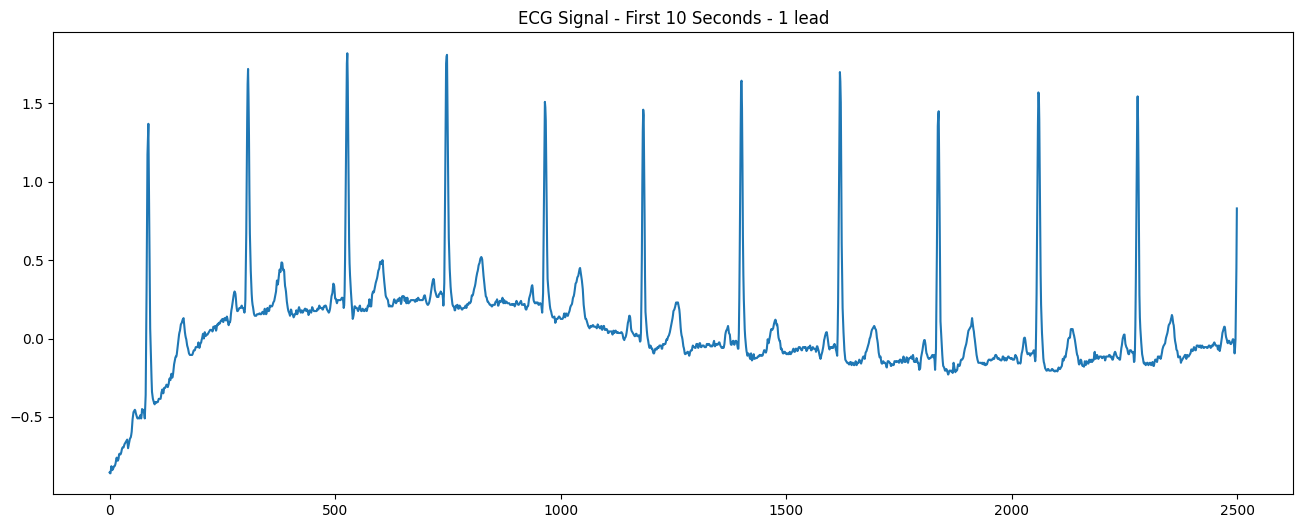

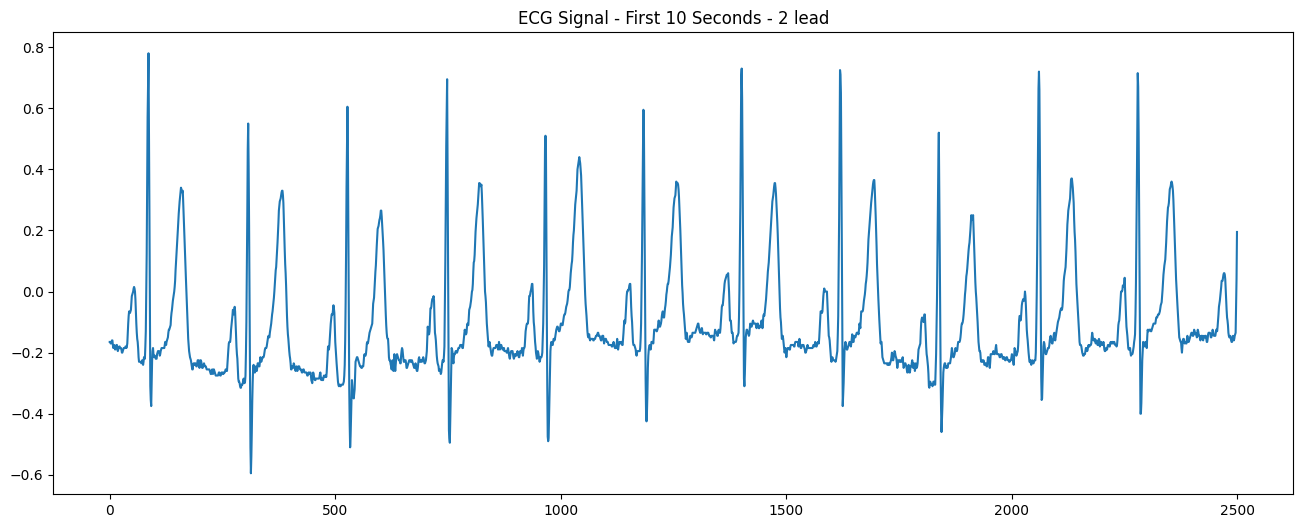

In [ ]:
samples_10_seconds = ecg_frequency * 10
x_10_sec = ecg_data[:samples_10_seconds, :]
for lead in range (leads_num):
  plt.figure(figsize=(16, 6))
  plt.title(f'ECG Signal - First 10 Seconds - {lead + 1} lead')
  plt.plot(x_10_sec[:, lead])
  plt.show()

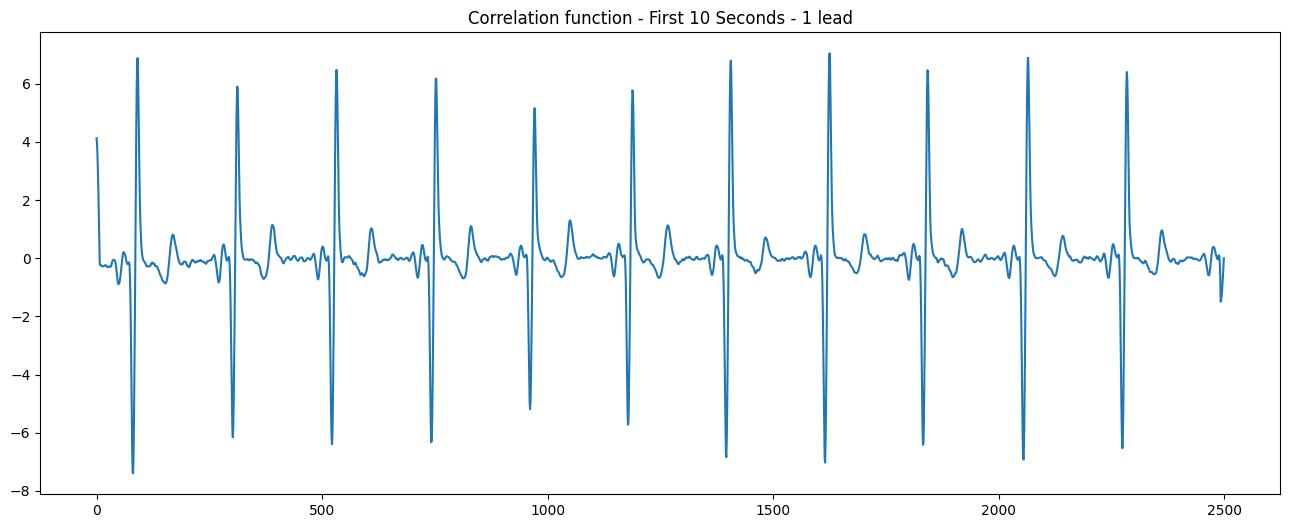

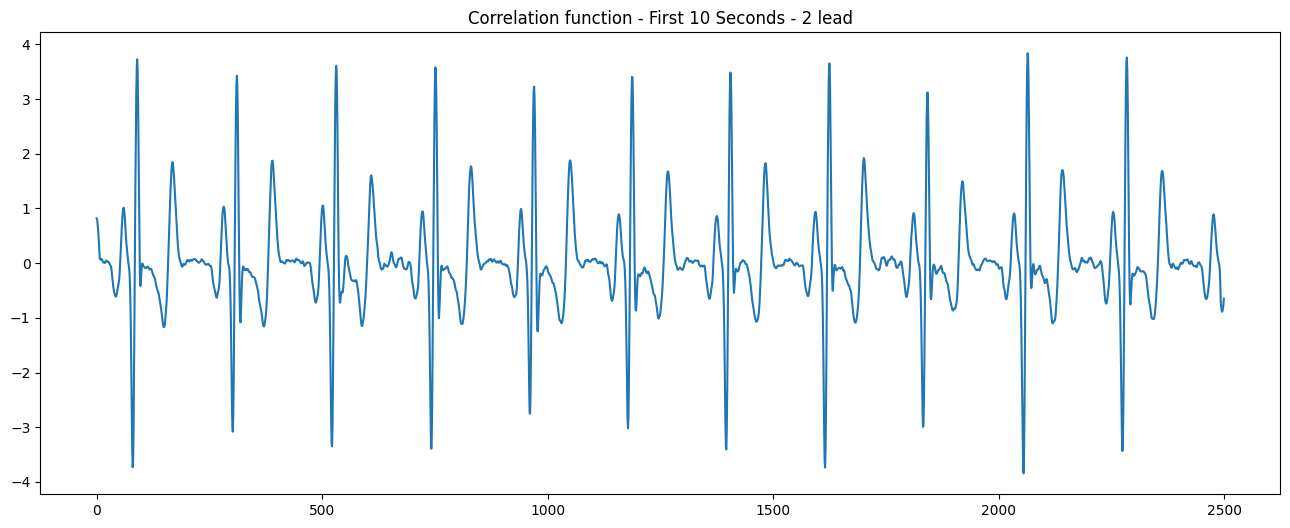

In [ ]:
v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)
peak_filter = np.sin(v)
acf_all_leads = np.ones((leads_num, samples_10_seconds))
for lead in range (leads_num):
  acf_lead = np.correlate(x_10_sec[:, lead], peak_filter, mode = "same")
  acf_all_leads[lead] = acf_lead
  plt.figure(figsize=(16, 6))
  plt.plot(acf_lead)
  plt.title(f"Correlation function - First 10 Seconds - {lead + 1} lead")
  plt.show()


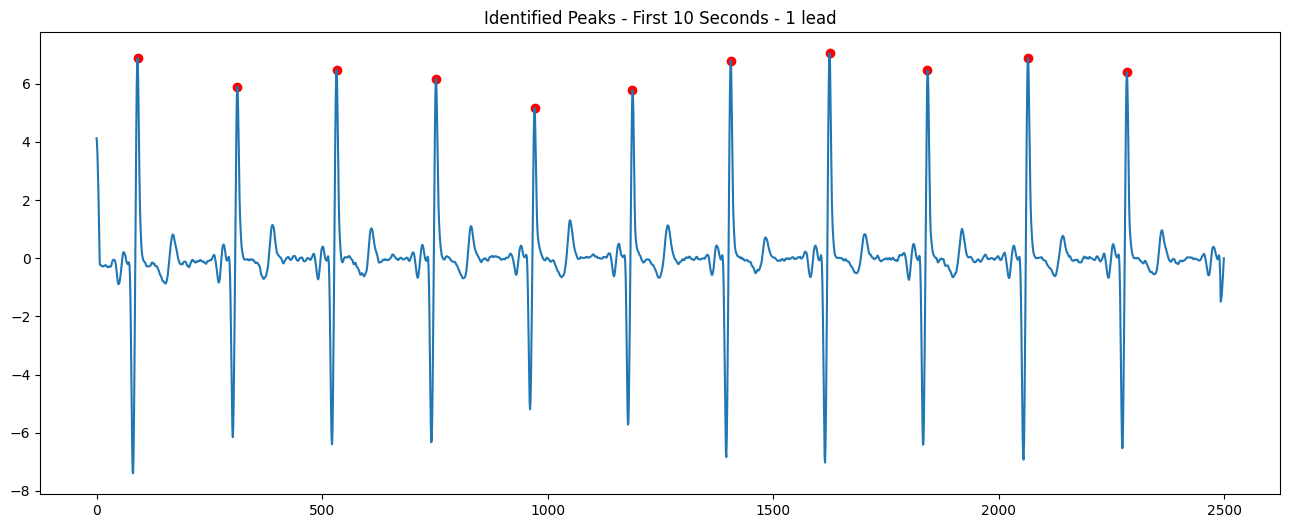

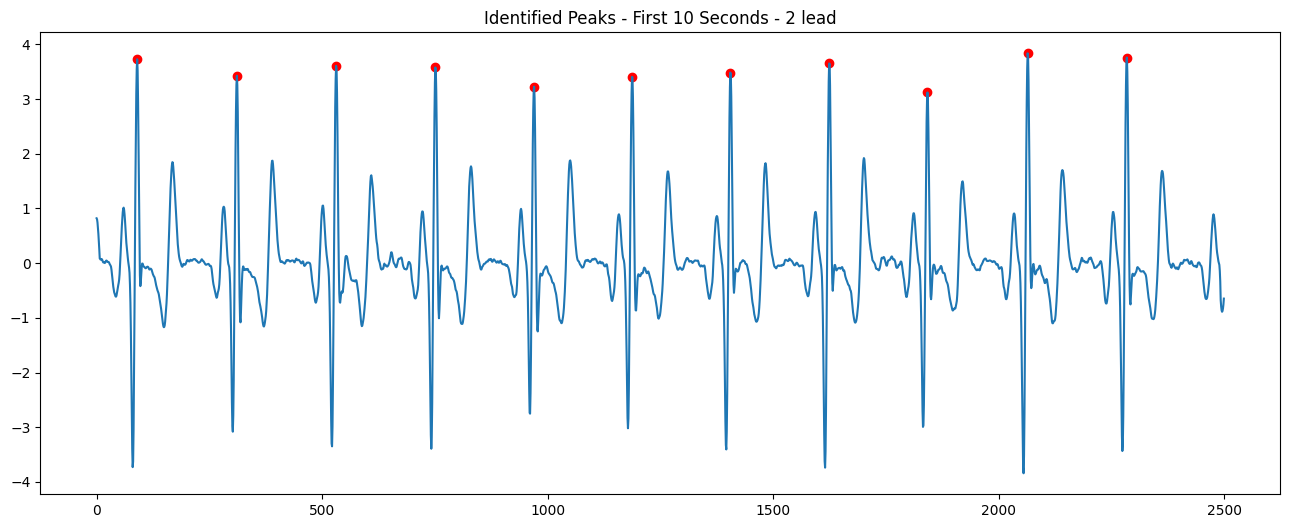

In [ ]:
def identify_peaks(acf_lead, lead_id):
  rr_peaks, _ = find_peaks(acf_lead, distance=60)
  plt.figure(figsize=(16, 6))
  plt.plot(acf_lead)
  z_scores = scipy.stats.zscore(acf_lead)
  rr_peaks = np.array([x for x in rr_peaks if z_scores[x] > 3])
  plt.scatter(rr_peaks, acf_lead[rr_peaks], color='red')
  plt.title(f"Identified Peaks - First 10 Seconds - {lead_id + 1} lead")
  plt.show()
  return rr_peaks

mean_dist = np.arange(leads_num)
for lead in range (leads_num):
  peaks_distances = np.diff(identify_peaks(acf_all_leads[lead], lead))
  mean_dist[lead] = np.median(peaks_distances)


In [ ]:
def calculate_heart_rate(mean_dist, lead_id):
  sec = mean_dist / record.fs
  heart_rate = 60 / sec
  print(f"Heart rate lead {lead_id + 1} = {heart_rate}")
  return heart_rate

heart_rate_ = np.arange(leads_num)
for lead in range (leads_num):
  heart_rate_[lead] = calculate_heart_rate(mean_dist[lead], lead)
print(heart_rate_)